In [27]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import seaborn as sns

from sklearn.model_selection import cross_validate

In [5]:
from sklearn import set_config
set_config(display= "diagram")

In [6]:
df = pd.read_csv("insurance.csv",sep = ',')

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<AxesSubplot:xlabel='age', ylabel='expenses'>

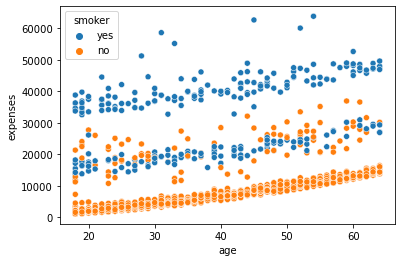

In [9]:
sns.scatterplot(data = df,x = 'age', y = 'expenses', hue = 'smoker')


<AxesSubplot:xlabel='age', ylabel='expenses'>

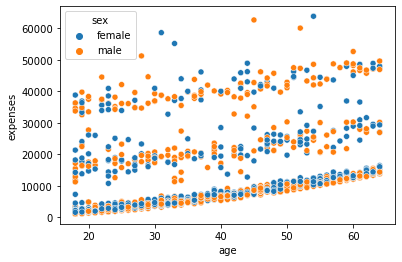

In [10]:
sns.scatterplot(data = df,x = 'age', y = 'expenses', hue = 'sex')


In [11]:
?sns.scatterplot

Univariate Regression

In [12]:
pipe_gender = Pipeline([('onehot', OneHotEncoder(sparse = False))])
data = pipe_gender.fit_transform(df['sex'].to_numpy().reshape(-1,1))
print(data)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [13]:
X_train, X_test = df['sex'].iloc[0:1000].to_numpy(), df['sex'].iloc[1000:1].to_numpy()
y_train = df['expenses'].iloc[0:1000].to_numpy()
y_test = df['expenses'].iloc[1000:1].to_numpy()

In [14]:
from sklearn.base import TransformerMixin, BaseEstimator

class Reshaper(TransformerMixin, BaseEstimator):
    
    def fit(self, x, y = None):
        self.length = x.shape[0]
        return self
    
    def transform(self, x,y = None):
        return x.reshape(-1,1)

In [15]:
reshape = Reshaper()
encoder = OneHotEncoder()
estimator = LinearRegression()
model = Pipeline([('reshape', reshape),
                 ('onehot', encoder),
                 ('estimator', estimator)])
model.fit(X_train, y_train)

Pipeline(steps=[('reshape', Reshaper()), ('onehot', OneHotEncoder()),
                ('estimator', LinearRegression())])

In [16]:
model.score(X_train, y_train)

0.0015650972090255344

Taking 4 Features 

In [17]:
X_train , X_test = df[['age', 'sex', 'bmi', 'children','smoker']].iloc[0:1000].to_numpy(), df[['age', 'sex', 'bmi', 'children','smoker']].iloc[1000:-1]


In [18]:
age_pipe = Pipeline([('scaler', StandardScaler())])
sex_pipe = Pipeline([('onehot', OneHotEncoder())])
bmi_pipe = Pipeline([('stdscaler', StandardScaler())])
smoker_pipe = Pipeline([('onehot', OneHotEncoder())])

In [19]:
final_pipe = ColumnTransformer([('age', age_pipe,[0]),
                               ('sex', sex_pipe, [1]),
                               ('bmi', bmi_pipe, [2]),
                               ('smoker', smoker_pipe, [4])],
                               remainder = 'passthrough')

In [20]:
estimator = LinearRegression()
model = Pipeline([('preprocess', final_pipe),
                  ('estimator', estimator)])


In [21]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0]),
                                                 ('sex',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  [1]),
                                                 ('bmi',
                                                  Pipeline(steps=[('stdscaler',
                                                                   StandardScaler())]),
                                                  [2]),
                                                 ('smoker',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  [4])])),
                ('estimator', LinearRegression())])

In [22]:
model.score(X_train, y_train)

0.754867506604932

In [23]:
model.named_steps['estimator'].coef_

array([  3756.97380469,    133.63128979,   -133.63128979,   1933.25606898,
       -11906.10680166,  11906.10680166,    417.15616338])

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf_reg = RandomForestRegressor()